# Mapeo de Hénon

Hénon propuso, en 1976, un mapeo en 2D sencillo que exhibiera las propiedades esenciales del sistema de ecuaciones de primer orden acopladas propuestas por Lorenz, con el objetivo de poder estudiar de forma sencilla dichas propiedades.

El mapeo imita una sección de Poincaré del atractor de Lorentz.

El mapeo propuesto es el siguiente:

\begin{equation}
T:\begin{cases}
    x_{i+1}=y_{i+1}+1-ax_{i}^{2} \\
    y_{i+1}=bx_{i}
\end{cases}
\end{equation}





Dicho mapeo se puede descomponer en tres etapas, i.e., $T\,=\,T'''T''T'$. Si se toma como condición inicial una elipse:


![](doblamiento_T1.png)

La primera etapa consiste en un doblamiento:

\begin{equation}
\begin{split}
    T':\,&x'=x\\
    &y'=y+1-ax^{2}
\end{split}
\end{equation}

![](doblamiento_T2.png)

La segunda etapa consiste en una contracción en $x$:

\begin{equation}
\begin{split}
    T'':\,&x''=bx'\\
    &y''=y
\end{split}
\end{equation}


![](doblamiento_T3.png)

La tercera etapa consiste en un reorientación en el eje x:

\begin{equation}
\begin{split}
    T''':\,&x'''=y''\\
    &y'''=x''
\end{split}
\end{equation}

![](doblamiento_T4.png)

El mapeo de Hénon es un mapeo con Jacobiano constante:

\begin{equation}
    \frac{\partial (x_{i+1},y_{i+1})}{\partial (x_{i},y_{i})}=-b
\end{equation}



Tiene dos puntos invariantes (o fijos) que están dados por:

\begin{equation}
\begin{split}
    &x=\frac{-(1-b)\pm\sqrt{(1-b)^{2}+4a}}{2a}\\
    &y=bx
\end{split}
\end{equation}



Dichos puntos son reales para:
\begin{equation}
a>a_{0}=-\frac{1}{4}(1-b)^{2}.
\end{equation}


En este caso, un punto es siempre linealmente inestable, mientras que el otro es inestable para 

\begin{equation}
a>a_{1}=\frac{3}{4}(1-b)^{2}.
\end{equation}

In [85]:
using Plots, LaTeXStrings, DataFrames
pyplot(markerstrokecolor=false)

LoadError: LoadError: ArgumentError: Module DataFrames not found in current path.
Run `Pkg.add("DataFrames")` to install the DataFrames package.
while loading In[85], in expression starting on line 1

A continuación definimoas el mapeo como una función de Hénon:

In [86]:
"""
    Henon(x, y, a, b)

Mapeo de Hénon.

"""

function Henon(x, y, a, b) 
     
    1 - a*x^2 + y , b*x
    
end 

Henon

# Áreas

Para determinar para cuales constantes el mapeo es conservativo y disipativo, se implentó un algoritmo que usa el método de Monte Carlo para medir áreas de una figura. En este caso la figura consiste de un círculo unitario que está dado por la parametrización:

$$ \sigma(t) = (cos t, sin t), \qquad t \in [0, 2 \pi].$$

Para medir el área de la figura después de iterarlo una vez con el mapeo de Hénon, se hace la compoción del mapeo de con la parametrización. Por ejemplo, para la primera iteración se tiene:

$$H \circ \sigma \ (t) = (1 - acos^2t + y , \ bsint),$$

de esta forma se parametriza la figura que resulta de iterar una vez el círculo unitario con el mapeo de Hénon. Si se vuelve a iterar lo anterior con el mapeo de Hénon, se obtine la parametrización de la figura que resulta de iterar dos veces el círculo unitario. Así se puede obtener figuras cerradas a las que se les puede medir el área. 

El método con el que se midieron las áreas consiste en los siguientes pasos:
- Poner la figura en un cuadrado que la contenga totalmente. El área del cuadrado se puede calcular fácilmente.
- Arrojar un número $N$ de puntos en el cuadrado.
- Contar la cantidad de puntos que caen dentro de la figura.
- El área de la figura va a estar dada por la siguiente relación:

$$A_{figura} = A_{cuadrado}\frac{a_{in}}{N},$$

   donde $a_{in}$ es el número de puntos que cae dentro de la figura, y $N$ es el total de puntos.

Se usó el método ["Inside Outside"](http://commons.bcit.ca/math/entertainment/inout/index.html), implementado en la función `in_or_out`, para determinar si un punto está dentro o fuera de una figua irregular. A continuación se declaran las funciones ocupadas para medir el área.

In [87]:
"""
    in_or_out(para, x, y)

Función que evalúa si un punto dado por `x` y `y` está dentro de una figura dada por una parametrización
en forma de un array `para` creado usando la función `condiones_iniciales_2D`.

"""

function in_or_out(para, x, y)
    
    crossings = 0
    
    for i in 1:length(para[1,:])-1
        
        if x < para[1, i] && x < para[1, i+1] || x > para[1, i] && x > para[1, i+1]
            
            nothing
            
        elseif y > para[2,i] && y > para[2, i+1]
            
            nothing
    
        elseif y < para[2,i] && y < para[2, i+1]
            
            if x < para[1, i] && x > para[1, i+1] || x > para[1, i] && x < para[1, i+1]
                
                crossings += 1
                
            end
            
        elseif y > para[2, i] && y < para[2, i+1]
            
            if x > para[1, i] && x < para[1, i+1]
                
                y_c = para[2,i] + (para[2, i+1] - para[2, i])*(x - para[1, i])/(para[1, i+1] - para[1, i])
                
                if y_c > y
                    
                    crossings += 1
                    
                end
                
            end
            
        elseif y < para[2, i] && y > para[2, i+1]
            
            if x < para[1, i] && x > para[1, i+1]
                
                y_c = para[2, i+1] + (para[2, i] - para[2, i+1])*(x - para[1, i+1])/(para[1, i] - para[1, i+1])

                if y_c > y

                    crossings += 1

                end

            end
            
        end
        
    end
    
    if iseven(crossings)
        
        return false
        
    elseif isodd(crossings)
        
        return true
        
    end
    
end

in_or_out

In [88]:
"""
    condiones_iniciales_2D(f::Function, t_range, a, b)

Función que guarda en un array de de 2×n una parametrización `f` para un rango `t_range`.
Los parámetros `a` y `b` sirven para parametrizaciones que requieran del mapeo de Hénon.

"""

function condiones_iniciales_2D(f::Function, t_range, a, b)
    CI = zeros(2, length(t_range))
    
    for i in 1:length(t_range)
        
        CI[1, i] = f(t_range[i], a, b)[1]
        CI[2, i] = f(t_range[i], a, b)[2]
        
    end
    
    CI
    
end

condiones_iniciales_2D

In [89]:
"""
    iterator(f::Function, X0, a, b, N)

Itera un array `X0` usando un mapeo `f`, un número `N` de veces. `a` y `b` son parámetros del mapeo
Hénon.

"""


function iterator(f::Function, X0, a, b, N)
    
    aux = copy(X0)
    orbit = zeros(size(aux))
    
    for j in 1:N
        
        for i in 1:length(aux[1, :])

            orbit[1, i] = f(aux[1, i], aux[2, i], a, b)[1]
            orbit[2, i] = f(aux[1, i], aux[2, i], a, b)[2]

        end
        
        aux = copy(orbit)
 
    end
    
    orbit
    
end 

iterator

In [90]:
"""
    invert_ceil(x)

Es una función que redondea hacia arriba un número positivo `x`, o si el número es negativo, lo redondea
hacia abajo.
"""

function invert_ceil(x)
    
    if x < 0 
        
        x = -ceil(abs(x))
        
    else
        
        x = ceil(x)
        
    end
    
    x
    
end

invert_ceil

In [91]:
"""
    randinterval(n, min, max)

La función da un arreglo con `n` números que son aleatorios en un intervalo definido por `min` y `max`.
"""

function randinterval(n, min, max)
    
    rand(n) * (max - min) + min
    
end

randinterval

In [92]:
"""
    enclosing_square(Param_array)

Es una función que dada una parametrización en forma de array `Param_array` que define una figura, 
calcula las coordenadas de un cuadrado que encierra completamente a esa figura.

"""

function enclosing_square(Param_array)
    
    x_min = invert_ceil(min(Param_array[1,:]...))
    x_max = invert_ceil(max(Param_array[1,:]...))
    y_min = invert_ceil(min(Param_array[2,:]...) )
    y_max = invert_ceil(max(Param_array[2,:]...))
    
    return (x_min, x_max), (y_min, y_max)
    
end

enclosing_square

In [93]:
"""
    itera_parametrizacion_henon(n)

Es una función que declara funciones anónimas que son la composición de la parametrización del círculo
unitario con el mapeo de Hénon. El parámetro `n` es el número de composiciones con el mapeo de Hénon.

"""

function itera_parametrizacion_henon(n)
    
    #1 - a*x^2 + y , b*x
    
    x = "cos(t)"
    y = "sin(t)"

    for i in 1:n

        xi = "1 - a*($x)^2 + ($y)"
        yi = "b*($x)"
        x = xi
        y = yi

    end

    ex = parse(x*" , "*y)
    ex_ret = :( (t, a, b) -> $ex )
    eval(ex_ret)
end  

itera_parametrizacion_henon

In [94]:
itera_parametrizacion_henon(3)(0, 1.4, 0.3)

(-0.7408864000000001,0.32280000000000003)

In [95]:
"""
    find_area(Σ::Function, t_range, N, a, b)

Función que calcula el área de una figura dada por una parametrización Σ, usando el método de 
Monte Carlo para calcular áreas. El rango `t_range`es el rango donde está definida la 
parametrizacion Σ, `N` es el número de puntos que se van a arrrojar para medir el área y los 
parámetros `a` y `b` son para las parametrizaciones de figuras que surgen de iterar el mapeo 
de Hénon. Para que funcione Σ debe tomar por argumentos Σ(t, a, b), aunque a y b no se 
requieran para la parametrización.


"""
function find_area(Σ::Function, t_range, N, a, b)
    
    parametrization = condiones_iniciales_2D(Σ, t_range, a, b)
    x_limites, y_limites = enclosing_square(parametrization)
    inside = 0
    total = N
    area = (x_limites[end] - x_limites[1]) * (y_limites[end] - y_limites[1])
    
    for i in 1:N
        
        x = randinterval(1, x_limites[1], x_limites[end])[1]
        y = randinterval(1, y_limites[1], y_limites[end])[1]
        
        if in_or_out(parametrization, x, y)
            
            inside += 1
            
        end
    end

    area * inside / total
    
end

find_area

In [96]:
"""
    Error_area(θ, t_range, points_number, a, b, N)

Calcula el error de la función `find_area` para una parametrización θ, y un número N de muestras. 
la variable points_number, a, b son variables que se usan en la función `find_area`. La función
regresa el área promedio y el error asociado.
"""

function Error_area(θ, t_range, points_number, a, b, N)
    
    areas = zeros(N)
    
    for i in 1:N
        
        areas[i] = find_area(θ, t_range, points_number, a, b)
        
    end
    
    mean(areas) , std(areas)
    
end 

Error_area

In [97]:
t_rango = 0:0.01:2π

0.0:0.01:6.28

In [98]:
σ(t, a, b) = (cos(t), sin(t)) #parametrización del círculo.

σ (generic function with 1 method)

In [99]:
@time find_area(σ, t_rango, 1, 1.4, -1) #Compilamos la función.

  0.237983 seconds (44.80 k allocations: 1.901 MB)


4.0

In [100]:
@time find_area(σ, t_rango, 1000000, 1.4, -1) #Área del círculo con 1 millón de puntos, param. 1.4 y -1 son irrelevantes

  5.163919 seconds (8.01 M allocations: 5.379 GB, 29.39% gc time)


3.142672

In [101]:
Error_area(σ, t_rango, 10, 1.4, -1, 1) #Compilamos la función.

(2.0,NaN)

In [102]:
@time Error_area(σ, t_rango, 100000, 1.4, -1, 10) #Se mide el área 50 veces con cien mil puntos.

  4.619667 seconds (8.05 M allocations: 5.381 GB, 28.15% gc time)


(3.1449000000000003,0.005398773523269539)

Ya que el Jacobiano nos indica si hay una contracción o expansión del área dependiendo del parámetro $b$. En el caso del mapeo de Hénon se tienen el Jacobiano es la constante $-b$, por tanto, para $b = 1$ y $b = -1$ se espera que no haya contracción, y el área se mantenga constante.

- ### Área para $b = 1$, $a=-1.4$.

En la siguiente gráfica se muestran el círculo unitario y las iteraciones del circulo. Se sabe que el área del círculo es $\pi r^2$, por tanto se espera que para este caso el área para todos los iterados sea de $\pi$.

In [103]:
t_rango = 0:0.001:2π
CI1_1 = condiones_iniciales_2D(σ, t_rango, 1.4, 1, )
CI1_2 = iterator(Henon, CI1_1, 1.4, 1, 1)
CI1_3 = iterator(Henon, CI1_2, 1.4, 1, 1)
CI1_4 = iterator(Henon, CI1_3, 1.4, 1, 1)

2×6284 Array{Float64,2}:
 -3.81585  -3.82041  -3.82498  -3.82954  …  -3.80585  -3.81043  -3.815  
  1.776     1.77712   1.77824   1.77936      1.77355   1.77467   1.77579


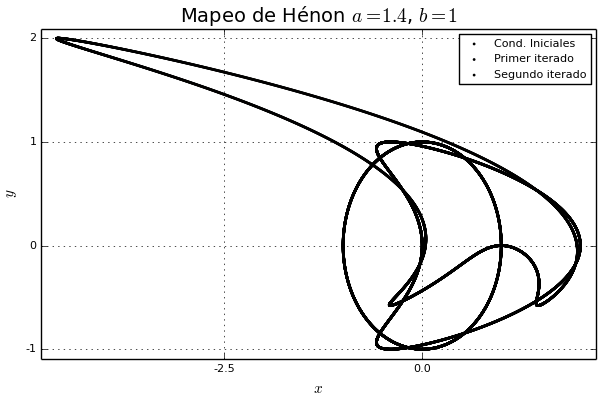

In [104]:
scatter(CI1_2[1,:], CI1_2[2,:], markersize=(1), markercolor=:green, label=("Cond. Iniciales"))
scatter!(CI1_1[1,:], CI1_1[2,:], markersize=(1), markercolor=:blue, label=("Primer iterado"))
scatter!(CI1_3[1,:], CI1_3[2,:], markersize=(1), markercolor=:orange, label=("Segundo iterado"))
#scatter!(CI1_4[1,:], CI1_4[2,:], markersize=(1), markercolor=:red, label=("Segundo iterado"))
xlabel!(L"x")
ylabel!(L"y")
title!(L"Mapeo de Hénon $a = 1.4$, $b=1$")

Usando la función `find_area` se calcula las áreas de los primeros tres iterados.

In [105]:
areas_b_1 = zeros(4, 2)

#Área del circulo
areas_b_1[1, 1], areas_b_1[1, 2] = Error_area(σ, t_rango, 100000, 1.4, 1, 10)

#Área 1er, 2do y 3er iterado
for i in 1:3
    
    areas_b_1[i+1, 1], areas_b_1[i+1, 2] = Error_area(itera_parametrizacion_henon(i), t_rango, 100000, 1.4, 1, 10)

end

areas_b_1

4×2 Array{Float64,2}:
 3.14201  0.00376784
 3.1417   0.00769436
 3.13364  0.0235717 
 3.16911  0.0776997 

In [106]:
Area_frame_b_1 = DataFrame(Parametrización = ["Círculo", "1º iterado", "2º iterado", "3º iterado"], 
    Áreas_promedio = areas_b_1[:,1], Error =  areas_b_1[:, 2])

LoadError: LoadError: UndefVarError: DataFrame not defined
while loading In[106], in expression starting on line 1

Para obtener la anterior gráfica se usaron un millón de puntos para el método de Monte Carlo. Se observa que hasta el tercer iterado el área se mantiene cercana al valor de $\pi$. Por tanto concluimos que para $b = 1$, el mapeo de Hénon es conservativo.

- ### Área para $b = -1$, $a=-1.4$.

En este caso se espera que se mantenga constante el área del círculo conforme se vaya iterando con el mapeo de Hénon. La siguiente gráfica muestra el círculo y sus iteraciones. Si se compara con la gráfica anterior con $b = 1$, se observa que la orientación de las deformaciones están invertidas.

In [107]:
t_rango = 0:0.001:2π
CI_1_1 = condiones_iniciales_2D(σ, t_rango, 1.4, -1)
CI_1_2 = iterator(Henon, CI_1_1, 1.4, -1, 1)
CI_1_3 = iterator(Henon, CI_1_2, 1.4, -1, 1)
CI_1_4 = iterator(Henon, CI_1_3, 1.4, -1, 1)

2×6284 Array{Float64,2}:
 1.32975  1.32945   1.32915   1.32884   …  1.33039   1.3301    1.32981 
 0.224    0.222879  0.221757  0.220634     0.226444  0.225327  0.224208


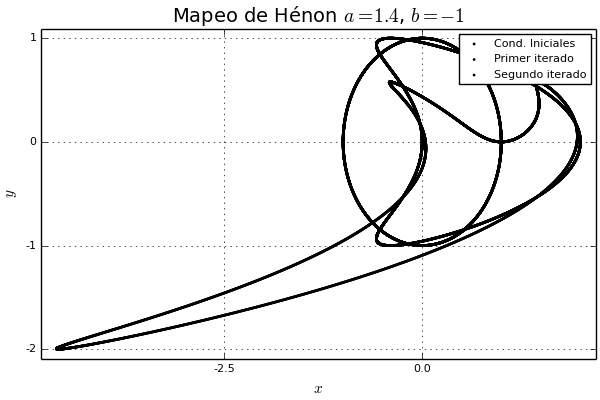

In [108]:
scatter(CI_1_1[1,:], CI_1_1[2,:], markersize=(1), markercolor=:blue, label=("Cond. Iniciales"))
scatter!(CI_1_2[1,:], CI_1_2[2,:], markersize=(1), markercolor=:green, label=("Primer iterado"))
scatter!(CI_1_3[1,:], CI_1_3[2,:], markersize=(1), markercolor=:orange, label=("Segundo iterado"))
#scatter!(CI_1_4[1,:], CI_1_4[2,:], markersize=(1), markercolor=:red, label=("Tercer iterado"))
title!(L"Mapeo de Hénon $a = 1.4$, $b=-1$")
xlabel!(L"x")
ylabel!(L"y")

In [109]:
areas_b__1 = zeros(4, 2)

#Área del circulo
areas_b__1[1, 1], areas_b__1[1, 2] = Error_area(σ, t_rango, 100000, 1.4, -1, 10)

#Área 1er, 2do y 3er iterado
for i in 1:3
    
    areas_b__1[i+1, 1], areas_b__1[i+1, 2] = Error_area(itera_parametrizacion_henon(i), t_rango, 100000, 1.4, -1, 10)

end

areas_b__1

4×2 Array{Float64,2}:
 3.14298  0.00376931
 3.13754  0.0118184 
 3.13181  0.0187922 
 3.13582  0.138729  

In [110]:
Area_frame_b__1 = DataFrame(Parametrización = ["Círculo", "1º iterado", "2º iterado", "3º iterado"], 
    Áreas_promedio = areas_b__1[:,1], Error =  areas_b__1[:, 2])

LoadError: LoadError: UndefVarError: DataFrame not defined
while loading In[110], in expression starting on line 1

Se usaron un millón de puntos para medir cada una de las áreas. Se puede apreciar que el área de los iterados se mantiene cercano al valor $\pi$, por tanto, es conservativo.

- ### Área para $b = 0.3$, $a=-1.4$.

Para estas constantes se espera que el área sí se contraiga. La siguiente siguiente gráfica muestra las iteraciones del círculo unitario con la cosntante $b = 0.3$.

In [111]:
t_rango = 0:0.001:2π
CI03_1 = condiones_iniciales_2D(σ, t_rango, 1.4, 0.3)
CI03_2 = iterator(Henon, CI03_1, 1.4, 0.3, 1)
CI03_3 = iterator(Henon, CI03_2, 1.4, 0.3, 1)
CI03_4 = iterator(Henon, CI03_3, 1.4, 0.3, 1)

2×6284 Array{Float64,2}:
 -0.740886  -0.743962  -0.747041  …  -0.734175  -0.737244  -0.740317
  0.3228     0.323136   0.323472      0.322066   0.322402   0.322738


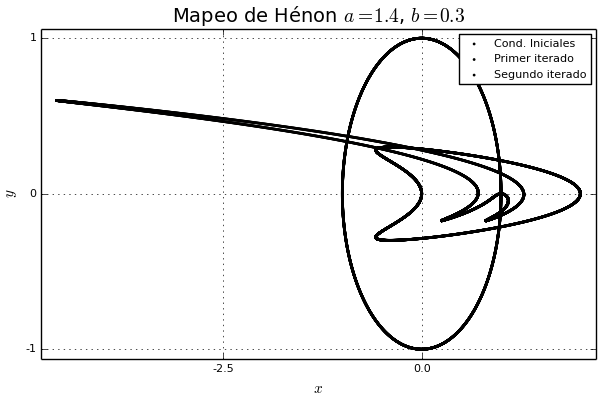

In [112]:
scatter(CI03_1[1,:], CI03_1[2,:], markersize=(1), markercolor=:blue, label=("Cond. Iniciales"))
scatter!(CI03_2[1,:], CI03_2[2,:], markersize=(1), markercolor=:green, label=("Primer iterado"))
scatter!(CI03_3[1,:], CI03_3[2,:], markersize=(1), markercolor=:orange, label=("Segundo iterado"))
#scatter!(CI03_4[1,:], CI03_4[2,:], markersize=(1), markercolor=:red, leg=false)
title!(L"Mapeo de Hénon $a = 1.4$, $b=0.3$")
xlabel!(L"x")
ylabel!(L"y")

In [113]:
areas_b_03 = zeros(4, 2)

#Área del circulo
areas_b_03[1, 1], areas_b_03[1, 2] = Error_area(σ, t_rango, 100000, 1.4, 0.3, 10)

#Área 1er, 2do y 3er iterado
for i in 1:3
    
    areas_b_03[i+1, 1], areas_b_03[i+1, 2] = Error_area(itera_parametrizacion_henon(i), t_rango, 100000, 1.4, 0.3, 10)

end

areas_b_03

4×2 Array{Float64,2}:
 3.13912   0.00551397
 0.944724  0.00857635
 0.280574  0.00617428
 0.088815  0.00655047

In [114]:
Area_frame_b_03 = DataFrame(Parametrización = ["Círculo", "1º iterado", "2º iterado", "3º iterado"], 
    Áreas_promedio = areas_b_03[:,1], Error =  areas_b_03[:, 2])

LoadError: LoadError: UndefVarError: DataFrame not defined
while loading In[114], in expression starting on line 1

Para estos parámetros se aprecia que el área disminuye conforme se va iterando las parametrizaciones, por tanto, se concluye que para $b=0.3$, el mapeo de Hénon no es conservativo. 

## Mapeos en 2D
### Estabilidad de puntos fijos

Un mapeo en dos dimensiones se puede caracterizar, al igual que un mapeo en una dimensión, con la estabilidad de sus puntos fijos, sus órbitas periódicas y otras propiedades que dependen de los parámetros del mapeo. 

Sea $f(\vec{x},\alpha)$ un mapeo en dos dimensiones, con $ \vec{x}=(x,y)$  y $\alpha$ un conjunto de parámetros de los que depende el mapeo.

Los puntos fijos serán aquellos que satisfagan

$$f(\vec{x}^*,\alpha)=\vec{x}^*$$

Para mapeos lineales de la forma 

$$f(\vec{x})=A\vec{x}$$  (con A una matriz de $2\times2$) se tiene que sus puntos fijos son los que satisfacen 

$$A\vec{x}^*=\vec{x}^*$$

o bien 

$$ (A-I)\vec{x}^*=0$$

Si $(A-I)$ es no singular, entonces $\vec{x}^*$ es el unico punto de equilibrio del sistema, pero si $(A-I)$ es singular, hay una familia de puntos de equlibrio. En tal caso se define

$$\vec{y}=\vec{x}-\vec{x}^*$$ 

y se obtiene un nuevo mapeo 

$$f_y(\vec{y})=A\vec{y}$$ 
cuyos puntos de equlibrio satisfacen

$$\vec{y}^*=A\vec{y}^*$$

Así las ropiedades de estabilidad de un punto de equilibrio $\vec{x}^*\neq 0 $ son las mismas que las de un punto de equilibrio $\vec{x}=0$. Sea

$$J=P^{-1}AP$$

la forma canónica de Jordan de A. Sea también 

$$\vec{y}=P^{-1}\vec{x}$$

Entonces el sistema original se transforma a 

$$f_y(\vec{y})=J\vec{y}$$ 


Hay tre posibles formas canónicas de Jordan que se pueden tener, como se vio en clase. Estas formas son:
\begin{equation*}
\left( 
\begin{array}{cc}
\alpha & -\beta \\
\beta & \alpha 
\end{array} 
\right), 
\left( 
\begin{array}{cc}
\lambda & 1 \\
0 & \lambda 
\end{array} 
\right),
\left( 
\begin{array}{cc}
\lambda & 0 \\
0 & \mu
\end{array} 
\right),
\end{equation*}
donde $\alpha, \beta, \lambda$ y $\mu$ son reales, con $\beta\ne 0$ y $\mu\ne\lambda$. En esta forma, los elementos de la diagonal son los eigenvalores, excepto para la primer matriz, cuyos eigenvalores son $\alpha\pm i \beta$.

Para el caso general en que el mapeo $f(\vec{x},\alpha)$ no es lineal, se puede linealizar con la matriz jacobiana $J_b$ y así estudiar localmente el comportamiento alrededor de los puntos fijos del mapeo.

Por ahora se estudiará el caso en el que los eigenvalores son dos reales distintos. 

Cuando se tienen dos eigenvalores reales distintos, los puntos fijos pueden ser:

- Puntos fijos aasíntoticamente estables: $\lambda_1\lt\lambda_2\lt1$
- Puntos fijos  inestables: $\lambda_1\gt\lambda_2\gt1$
- Puntos fijos silla: $0 \lt \lambda_1 \lt 1, \lambda_2\gt1$
- Puntos fijos degenerados: $\lambda_1=1, \lambda_1 \gt \lambda_2$
- Punto fijo estable:$-1\lt\lambda_1\lt 0 \lt\lambda_2\lt1$
- Punto fijo estable: $-1\lt\lambda_1\lt\lambda_2\lt0$
- Punto fijo silla: $\lambda_1\lt -1 \lt \lambda_2 \lt 0$
- Punto fijo silla: $\lambda_1\lt -1$ y  $ 0\lt\lambda_2 \lt 1$
- Punto fijo silla: $-1\lt\lambda_1\lt 0$ y  $ 1\lt\lambda_2$

Nota: Los puntos fijos silla son inestables.

Esto se usa para estudiar los puntos fijos del  **mapeo clásico de Hénon** que  está definido por 

$$ \begin{array}{cc}
x_{n+1}=& 1-ax^2_n+y_n \\
y_{n+1}= & bx_n 
\end{array} $$


La matriz jacobiana de este mapeo es:

\begin{equation*}
J_b=\left( 
\begin{array}{cc}
-2ax & 1 \\
b & 0 
\end{array} 
\right)
\end{equation*}

Sus eigenvalores están dados por 

$$\lambda_{\pm}=-ax\pm\sqrt{(ax)^2+b}$$

Estos eigenvalores son reales y diferentes simpre que se satisfaga $b\gt-(ax)^2$

Los puntos fijos del mapeo de Hénon están dados por 

$$x=\frac{(1-b)}{2a}\pm 1/2\sqrt{(1-b)^2+4a}$$

$$y=bx$$

Por lo que existen dos puntos fijos en el plano $XY$ para cuando 

$$a\gt-1/4(1-b)^2$$

y un solo punto fijo en el plano $XY$ si
$$a=-1/4(1-b)^2$$

A continuación se escriben algunas funciones que permitirán estudiar la estabilidad de los puntos fijos del mapeo de Hénon.

In [115]:
"""
    Henon_map(x,y,a,b)

Función que define el mapeo de Henon en 2D

"""
function Henon_map(x,y,a,b)
    fx=y+1-a*x^2
    fy=b*x
    return fx,fy
end 

Henon_map

In [116]:
"""
    Fixed_points(a,b)

Calcula los puntos fijos para los parametros `a` y `b` del mapeo de Hénon.
"""

function Fixed_points(a,b)
    xf1=-(1-b)/(2a)+(1/2a)*sqrt((1-b)^2+4a)
    xf2=-(1-b)/(2a)-(1/2a)*sqrt((1-b)^2+4a)
    yf1=b*xf1
    yf2=b*xf2
    return (xf1,yf1),(xf2,yf2)
end 

Fixed_points

In [117]:
"""
    Jacobian_henon(x,y,a,b)

Función que calcula el Jacobiano para las coordenadas `x` y `y` y los parámetros `a` y `b`.
"""

function Jacobian_henon(x,y,a,b)
    Df=[[-2a*x,b] [1,0]]
    return Df
end 

Jacobian_henon

In [118]:
"""
    EigenVals_JacHen(x,y,a,b)

Calcula los eigenvalores del jacobiano del mapeo de Hénon.
"""
function EigenVals_JacHen(x,y,a,b)
    λ₁=-a*x+sqrt((a*x)^2+b)
    λ₂=-a*x-sqrt((a*x)^2+b)
    return λ₁,λ₂
end 

EigenVals_JacHen

## Conjutos de Julia

Ya que se sabe cómo determinar la estabilidad de los puntos fijos del mapeo de Hénon, se necesita estudiar las órbitas que se obtienen al iterar $N$ veces en el mapeo de Hénon una condición inicial $\vec{x}_0$. 

Tal como se hizo en la tarea 2, exploremos una región grande el el plano $XY$ para darnos una idea de cuáles son las condiciones iniciales que al iterarse convergen a alguna órbita acotada en el espacio $XY$ y cuáles otras condiciones "explotan" rápidamente después de iterar el mapeo una cantidad finita de veces.

La siguiente función es un algoritmo que construye el conjunto de Julia para una región en el espacio $XY$

In [119]:
"""Función que grafica el conjunto de Julia generado por el mapeo f(z,c), en donde z 
es la variable en el plano complejo y c el parametro que caracteriza al 
sistema dinamico z_{n+1}=f(z_n)

init_cond =  la malla de condiciones iniciales en el plano complejo 

m =  numero limite de iteraciones del mapeo

R= radio del circulo en el plano complejo que se toma como criterio de divergencia

"""
function Julia_set_Henon(a,b,xrange,yrange,maxiter,R)
    
    mx=length(xrange)
    my=length(yrange)
    iterandos=zeros(my,mx) 
    for i in 1:mx
        for j in 1:my
            x=xrange[i]
            y=yrange[my+1-j]
                for k in 1:maxiter
                x,y=Henon_map(x,y,a,b)
                iterandos[j,i]=k
                    if sqrt(x^2+y^2)>=R 
                    break
                    end 
                end
        end 
    end
    return iterandos
end

Julia_set_Henon

 ## Órbitas 
Las órbitas de un mapeo pueden ser periódicas (con periodo $n$) o pueden ser aperiódicas. A veces la iteración de un mapeo da lugar a lo que se conoce como *atractores extraños*.

Una manera de entender superficialmente un *atractor extraño* es como una **órbita aperiódica recurrente**.

Resulta ser que el mapeo de Hénon clásico ($a=1.4,b=0.3$) tiene un atractor extraño.

En seguida se pintarán las órbitas que se obtienen al iterar $N$ veces bajo el mapeo de Hénon, una condición $\vec{x}_0$. Estas condiciones iniciales se deben escoger de manera que no diverjan después de $m$ iterados. Para ello se analizan los conjuntos de Julia mostrados anteriormente y los puntos fijos para distintas parejas de parámetros $(a,b)$, y se definen funciones para ello.

In [120]:
"""
    iter_Henon(x0,y0,a,b,N)

Función que itera N veces el mapeo de Henon a partir de una condición inicial (x0,y0) 
con parámetros a,b.

"""
function iter_Henon(x0,y0,a,b,N)
    Henon_ab(x,y)=Henon_map(x,y,a,b)
    xx=Float64[]
    yy=Float64[]
    push!(xx,x0)
    push!(yy,y0)
    x,y=Henon_ab(x0,y0)
    for i in 1:N
        x,y=Henon_ab(x,y)
        if abs(x)<1e-10
            push!(xx,0.0)
        else
            push!(xx,x)
        end 
        if abs(y)<1e-10
            push!(yy,0.0)
        else
            push!(yy,y)
        end 
    
    end 
    return xx,yy
end 

iter_Henon

# Caso conservativo 

En este caso $b=-1$ y $b=1$. 

Para $b=-1$, $a=1.4$ se tiene lo siguiente:

In [121]:
a=1.4
b=-1
xf1,xf2=Fixed_points(a,b)

((0.39228095605926205,-0.39228095605926205),(-1.8208523846306908,1.8208523846306908))

In [122]:
Jac1=Jacobian_henon(xf1[1],xf1[2],a,b)
Jac2=Jacobian_henon(xf2[1],xf2[2],a,b);

In [123]:
λ1,λ2=eigvals(Jac1)

2-element Array{Complex{Float64},1}:
 -0.549193+0.835695im
 -0.549193-0.835695im

In [124]:
λ3,λ4=eigvals(Jac2)

2-element Array{Float64,1}:
 4.89406 
 0.204329

Aquí el primer punto fijo $\vec{x_1^*}=(0.3922...,-0.3922...)$ da una matriz Jacobiana cuyos valores propios son complejos. Cabe destacar que la norma de estos valores propios es $1$ .

In [125]:
abs(λ1)

1.0

Este caso corresponde a puntos fijos que se denominan **centros estables**, y dan lugar a órbitas periódicas cerradas en el espacio fase como se mostrará más adelante. 

El segundo punto fijo correspondiente a $\vec{x_2^*}=(-1.82085...,1.82085...)$ coresponde a un punto silla inestable ya que ambos eigenvalores son reales y satisfacen un de los criterios arriba mencionados.

Por tanto, el punto fijo en el caso **conservativo**

$$\vec{x}_1^*=(0.84515...,0.84515...)$$ 

también corresponde  a un punto silla (inestable).


In [126]:
λ1,λ2=EigenVals_JacHen(xf2[1],xf2[2],a,b)

(4.894057231540714,0.2043294454252198)

Por tanto el punto fijo en el caso **conservativo**

$$\vec{x}_2^*=(-0.84515...,-0.84515...)$$ 

también corresponde  a un punto silla (inestable).


Este tipo de análisis realizado para los conjuntos de parámetros $a=1.4,b=0.3,-1$ se puede realizar para cuales quiera dos pares de parámetros (a,b) siempre y cuando se satisfaga la condición de que existan puntos fijos en el plano complejo. Esta condición, como se mencionó anteriormente, se debe a que hay dos puntos fijos en el plano $XY$ para cuando 

$$a\gt-1/4(1-b)^2,$$

y un solo punto fijo en el plano $XY$ si

$$a=-1/4(1-b)^2$$. 


- A continuación se presenta el conjunto de Julia para $b=1.0$ y se varía $a$ de $-1$ a $3$.

![](JS_b_p1.gif)

- A continuación se presenta el conjunto de Julia para $b=-1.0$ y se varía $a$ de $-2$ a $4$.

![](JS_b_m1.gif)

## Órbitas caso conservativo

Se debe escoger una condición inicial que converja. De acuerdo al conjunto de Julia:



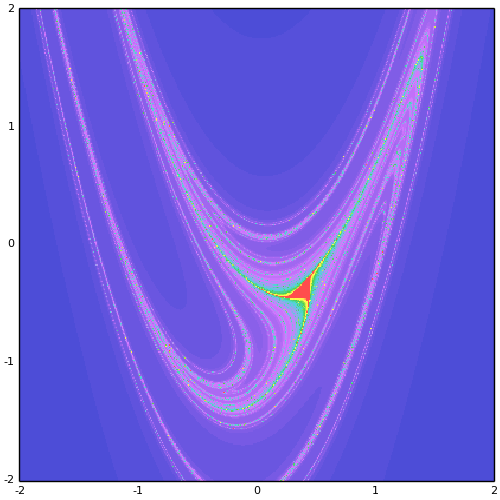

In [127]:
x_range=-2:1/100:2
y_range=-2:1/100:2
maxiter=80
R=10
a=1.4
b=-1
Ima=Julia_set_Henon(a, b, x_range, -y_range, maxiter, R)
heatmap(x_range, y_range, Ima, cbar=false, fillcolor= :lighttest,
        size = (500,500), yflip=false, annotations=(1, -3.3, text("a = 1.4  b = -1", :white)))


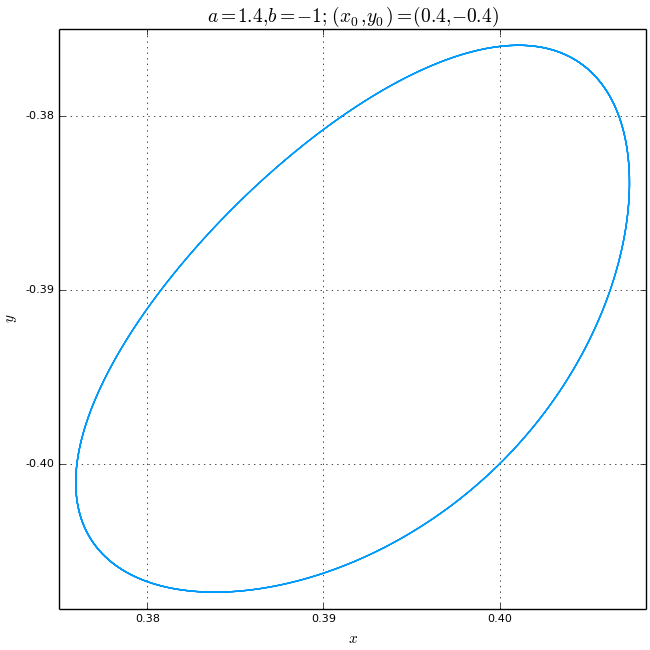

In [128]:
x0=0.4
y0=-0.4
a=1.4
b=-1
N=10000
xx,yy=iter_Henon(x0, y0, a, b, N);
scatter(xx,yy,ms=1,markerstrokecolor=false,label="",size=(650,650))
xlabel!(L"x")
ylabel!(L"y")
title!(L"$a=1.4,b=-1; \ (x_0,y_0)=(0.4,-0.4)$")

Se observa que es una órbita periódica cerrada. Se pintan más órbitas para el caso conservativo pero para distintos parámetros $a$. En cada caso se buscaron las condiciones iniciales que convergen con ayuda de los conjuntos de Julia o tomando un punto muy cercano al punto fijo.


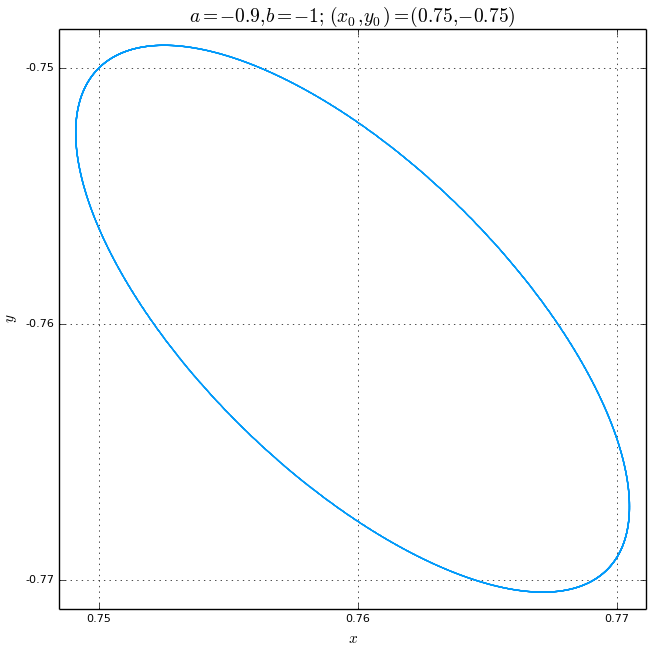

In [129]:
x0=0.75
y0=-0.75
a=-0.9
b=-1
N=10000
xx,yy=iter_Henon(x0, y0, a, b, N);
scatter(xx,yy,ms=1,markerstrokecolor=false,label="",size=(650,650))
xlabel!(L"x")
ylabel!(L"y")
title!(L"$a=-0.9,b=-1; \ (x_0,y_0)=(0.75,-0.75)$")


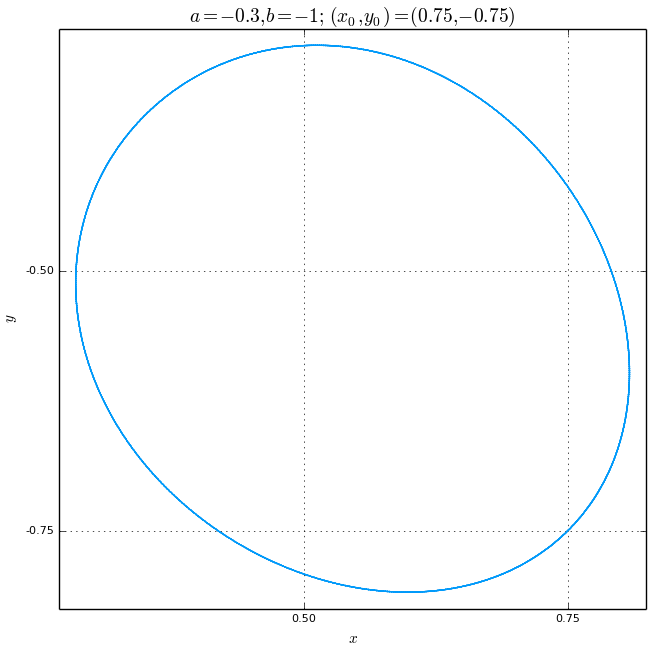

In [130]:
x0=0.75
y0=-0.75
a=-0.3
b=-1
N=10000
xx,yy=iter_Henon(x0, y0, a, b, N);
scatter(xx,yy,ms=1,markerstrokecolor=false,label="",size=(650,650))
xlabel!(L"x")
ylabel!(L"y")
title!(L"$a=-0.3,b=-1; \ (x_0,y_0)=(0.75,-0.75)$")

In [131]:
Fixed_points(1,-1)

((0.41421356237309515,-0.41421356237309515),(-2.414213562373095,2.414213562373095))


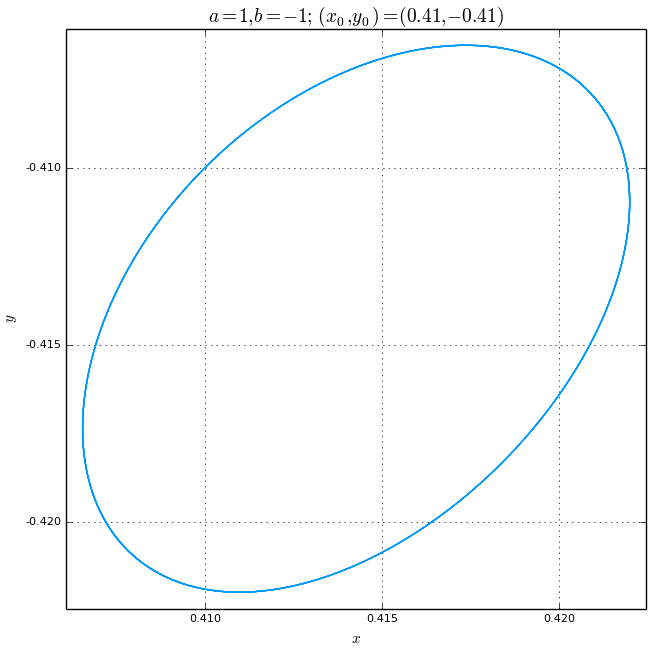

In [132]:
x0=0.41
y0=-0.41
a=1
b=-1
N=10000
xx,yy=iter_Henon(x0, y0, a, b, N);
scatter(xx,yy,ms=1,markerstrokecolor=false,label="",size=(650,650))
xlabel!(L"x")
ylabel!(L"y")
title!(L"$a=1,b=-1; \ (x_0,y_0)=(0.41,-0.41)$")


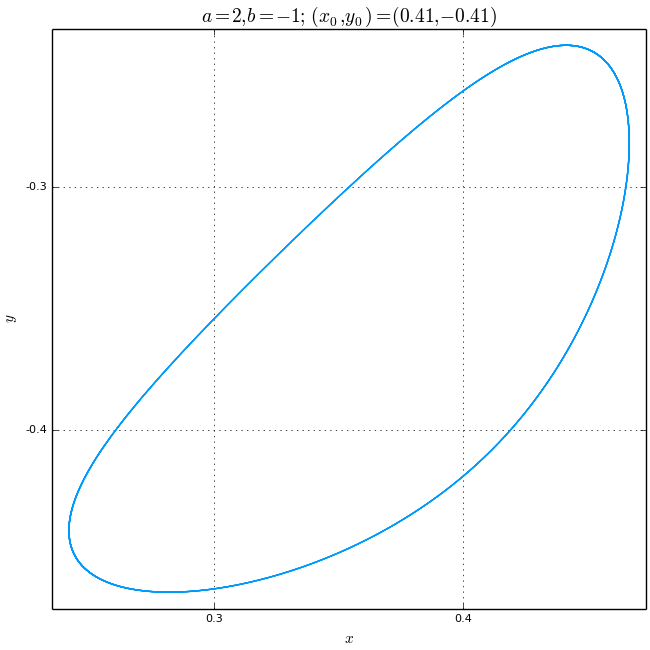

In [133]:
x0=0.41
y0=-0.41
a=2
b=-1
N=10000
xx,yy=iter_Henon(x0, y0, a, b, N);
scatter(xx,yy,ms=1,markerstrokecolor=false,label="",size=(650,650))
xlabel!(L"x")
ylabel!(L"y")
title!(L"$a=2,b=-1; \ (x_0,y_0)=(0.41,-0.41)$")

In [134]:
Fixed_points(3,-1)

((0.3333333333333333,-0.3333333333333333),(-1.0,1.0))


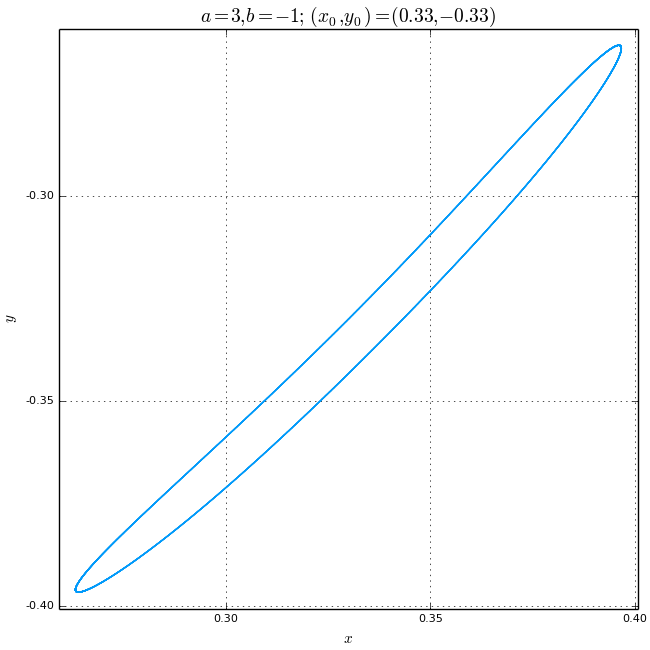

In [135]:
x0=0.33
y0=-0.33
a=3
b=-1
N=10000
xx,yy=iter_Henon(x0, y0, a, b, N);
scatter(xx,yy,ms=1,markerstrokecolor=false,label="",size=(650,650))
xlabel!(L"x")
ylabel!(L"y")
title!(L"$a=3,b=-1; \ (x_0,y_0)=(0.33,-0.33)$")

In [136]:
x0=x1f[1]
y0=x1f[2]
x1f,x2f=Fixed_points(a,b)

LoadError: LoadError: UndefVarError: x1f not defined
while loading In[136], in expression starting on line 1


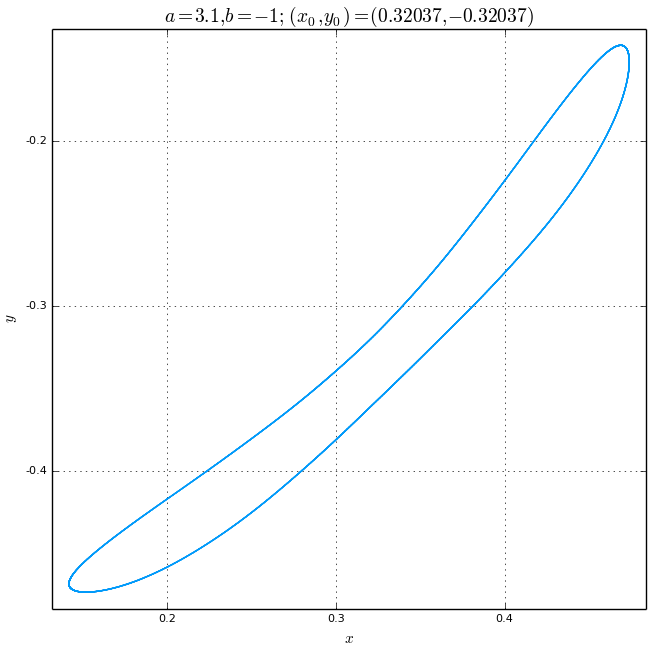

In [137]:

a=3.1
b=-1
x0=0.32037
y0=-x0

N=10000
xx,yy=iter_Henon(x0, y0, a, b, N);
scatter(xx,yy,ms=1,markerstrokecolor=false,label="",size=(650,650))
xlabel!(L"x")
ylabel!(L"y")
title!(L"$a=3.1,b=-1; \ (x_0,y_0)=(0.32037,-0.32037)$")

# Caso disipativo

En este caso $b\neq|1|$. Se escogen los parámetros $a=1.4,b=0.3$

In [138]:
a=1.4
b=0.3
xf1,xf2=Fixed_points(a,b);

In [139]:
xf1

(0.6313544770895047,0.1894063431268514)

In [140]:
xf2

(-1.1313544770895048,-0.3394063431268514)

In [141]:
λ1,λ2=EigenVals_JacHen(xf1[1],xf1[2],a,b)

(0.15594632230279393,-1.9237388581534067)

Por tanto, se ve que el punto fijo 

$$\vec{x^*_1}=(0.63135...,0.18940...)$$ 

es un punto fijo silla, que son puntos inestables.

Para el segundo punto fijo se tiene que los eigenvalores estan dados por:

In [142]:
λ3,λ4=EigenVals_JacHen(xf2[1],xf2[2],a,b)

(3.259822097891452,-0.09202956204083912)

Por tanto, el segundo punto fijo correspondiente a 

$$\vec{x^*_2}=(-1.13135...,-0.33940...)$$

también corresponde a un punto fijo silla (inestable).

A continuación se presenta el conjunto de Julia para $b=0.3$ y se varía $a$ de $-0.4$ a $3$.

![](JS_b_03.gif)

## Órbitas para caso disipativo.

In [143]:
x0=0 #punto fijo tomado del conjunto de Julia
y0=0
a=1.4
b=0.3
N=1000
xx,yy=iter_Henon(x0, y0, a, b, 10000);

In [144]:
Arange=-2:1/2^10:2
M=10000
Nlast=500
a=1.4
x0=0.
y0=0.
b=0.3

0.3

In [145]:
xx,yy=iter_Henon(x0, y0, a, b, 10000);

In [146]:
"""función que itera m veces un mapeo f(x) a patir de una condición inicial x_0
Devuelve los puntos x_n para toda n=1,2,...m en forma en un arreglo xvec"""
function iter_map(f::Function,x_0::Float64,m::Int)
    x=x_0
    xvec=Float64[]
    fvec=Float64[]
    push!(xvec,x)
    for i in 1:m
        x=f(x)
        if abs(x)<1e-10
            push!(xvec,0.0)
        else
        push!(xvec,x)
        end 
    end 
    return xvec
end 
     

iter_map

In [147]:
"""Funcion que devuelve un arreglo `diagBif´ con los últimos Nlast iterados de un mapeo f(x,c),
en donde c es un párametro. También devuelve un arreglo `cs´ que permite graficar el diagrama
de bifurcaciones
Los parámetros de entrada son los siguientes: 
-) f(x,c): la función a evaluar
-) crange: rango en el que se tomaran los valores del parámetro c
-) M: el número de iteraciones del mapeo
-) x0: la condición inicial
-) Nlast: los últimos iterados que se desea iterar para obtener las orbitas del diagrama de 
bifurcaciones
"""
function Bif_diag(Arange,M,x0,y0,b,Nlast)
diagBifX=Float64[]
diagBifY=Float64[]
As=Float64[]
    for a in Arange
        x=x0
        y=y0
        for i in 1:M
        x,y=Henon_map(x,y,a,b)
        end 
        for i in 1:Nlast
            push!(As,a)
            x,y=Henon_map(x, y, a, b)
            push!(diagBifX,x)
            push!(diagBifY,y)
        end
    end
    return As,diagBifX,diagBifY
end 

Bif_diag

Ahora se revisa que pasa con la iteración de una condición inicial, $\vec{x}_0$. Se itera N veces el mapeo de Hénon con los parámetros $a=1.4$,  $b=0.3$ y se muestra la órbita que se dibuja en el espacio fase $XY$:

In [148]:
x0=0
y0=0
a=1.4
b=0.3
N=10000
xx,yy=iter_Henon(x0, y0, a, b, N);


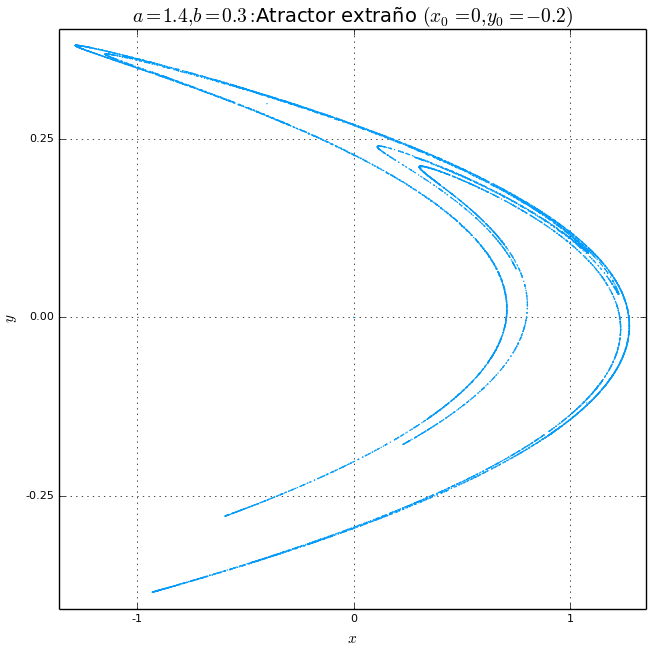

In [149]:
scatter(xx,yy,ms=1,markerstrokecolor=false,label="",size=(650,650))
xlabel!(L"x")
ylabel!(L"y")
title!(L"$a=1.4,b=0.3:$Atractor extraño $(x_0=0,y_0=-0.2)$")

De acuerdo a lo descrito en el artículo de Hénon [1], este atractor extraño es el producto de una línea en el plano $XY$  y un conjunto de Cantor.



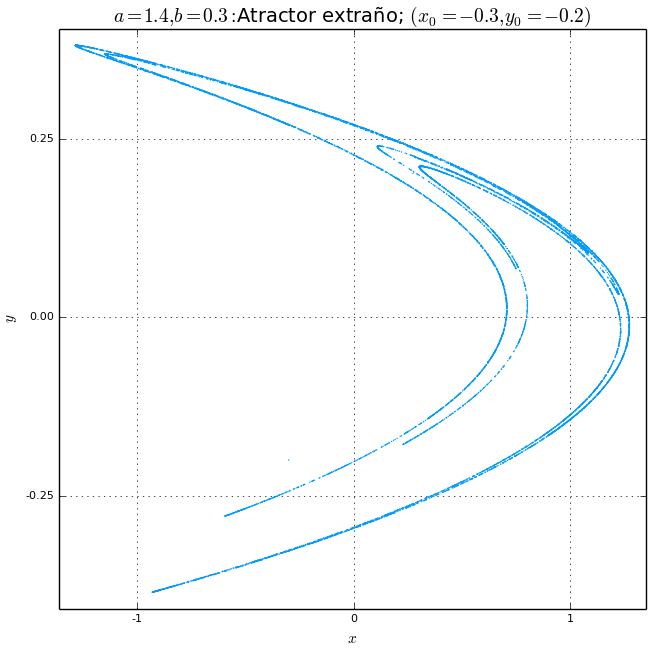

In [150]:
x0=-0.3
y0=-0.2
a=1.4
b=0.3
N=10000
xx,yy=iter_Henon(x0, y0, a, b, N);
scatter(xx,yy,ms=1,markerstrokecolor=false,label="",size=(650,650))
xlabel!(L"x")
ylabel!(L"y")
title!(L"$a=1.4,b=0.3:$Atractor extraño; $(x_0=-0.3,y_0=-0.2)$")

### Diagrama de Bifurcación

In [151]:
"""esta función calcula la longitud de la orbita solamente en las X de la iteración del 
mapeo de Hénon a partir de una condición inicial (x0,y0) y dos parámetros (a,b). La función 
itera Norb veces la condición inicial y a partir de ahí ve los valores distintos 
de las x_{n+i} para determinar la longitud de la orbita en as X.
"""
function orbit_lengthX(x0,y0,a,b,Norb)
    HenAB(x,y)=Henon_map(x,y,a,b)
    x=x0
    y=y0
    tol=1e-8
    cont=1
    for i in 1:Norb
        x,y=HenAB(x,y)
    end 
    xf=x
    yf=y
    xorbit,yorbit=HenAB(xf,yf)
    while abs(xf-xorbit)>tol
        cont=cont+1
        #xf=xorbit
        xorbit,yorbit=HenAB(xorbit,yorbit)   
        if cont>10*1024+1
            #println("numero de iterados insuficiente")
            break
        end 
    end 
    return cont
end

orbit_lengthX

In [152]:
"""esta función calcula la longitud de la orbita solamente en las Y de la iteración del 
mapeo de Hénon a partir de una condición inicial (x0,y0) y dos parámetros (a,b). La función 
itera Norb veces la condición inicial y a partir de ahí ve los valores distintos 
de las y_{n+i} para determinar la longitud de la orbita en as Y.
"""
function orbit_lengthY(x0,y0,a,b,Norb)
    HenAB(x,y)=Henon_map(x,y,a,b)
    x=x0
    y=y0
    tol=1e-8
    cont=1
    for i in 1:Norb
        x,y=HenAB(x,y)
    end 
    xf=x
    yf=y
    xorbit,yorbit=HenAB(xf,yf)
    while abs(yf-yorbit)>tol
        cont=cont+1
        xorbit,yorbit=HenAB(xorbit,yorbit)   
        if cont>6*1024+1
            #println("numero de iterados insuficiente")
            break
        end 
    end 
    return cont
end

orbit_lengthY

In [153]:
"""esta función calcula las longitudes de las orbitas en las X's y en las Y's de la iteración 
del mapeo de Hénon a partir de una condición inicial (x0,y0) y dos parámetros (a,b). La función 
itera Norb veces la condición inicial y a partir de ahí ve los valores distintos 
de las x_{Norb+i} y als y_{Norb+i} para determinar la longitud de la orbita en las X y en las Y
"""
function orbit_lengthXY(x0,y0,a,b,Norb)
    HenAB(x,y)=Henon_map(x,y,a,b)
    x=x0
    y=y0
    tol=1e-8
    contX=1
    contY=1
    for i in 1:Norb
        x,y=HenAB(x,y)
    end 
    xf=x
    yf=y
    xorbit,yorbit=HenAB(xf,yf)
    while abs(xf-xorbit)>tol
        contX=contX+1
        xorbit,yorbit=HenAB(xorbit,yorbit)   
        if contX>10*1024+1
            #println("numero de iterados insuficiente")
            break
        end 
    end 
    
    xorbit,yorbit=HenAB(xf,yf)
    
    while abs(yf-yorbit)>tol
        contY=contY+1
        xorbit,yorbit=HenAB(xorbit,yorbit)   
        if contY>10*1024+1
            #println("numero de iterados insuficiente")
            break
        end 
    end 
    
    
    return contX,contY
end

orbit_lengthXY

In [154]:
"""funcion que determina (si es que existe) el punto de bifurcación (en la variable x o en la 
variable y) del mapeo de Henon.
entre dos valores de parámetro a1 y a2 con Norb iteraciones a partir de la condicion inicial
(x0,y0)
En caso de existir bifurcación, la función devuelve el valor del parámetro 
'Ab' en donde se presenta la bifurcación
NOTA: Funciona mejor con Norb>1000000"""

function point_bif(x0,y0,a1,a2,Norb)
     tol=1e-8
    L1x,L1y=orbit_lengthXY(x0, y0, a1, b, Norb)
    L2x,L2y=orbit_lengthXY(x0, y0, a2, b, Norb)
    c1=a1
    c2=a2
        if (L1x-L2x)==0 #para las X's
            nothing
        else
             while abs(c1-c2)>tol
            cmed=(c1+c2)/2
            LmedX,LmedY=orbit_lengthXY(x0, y0, cmed, b, Norb) 
        if LmedX==L1x
            c1=cmed
                L1x,L1y=orbit_lengthXY(x0, y0, c1, b, Norb) 
        else LmedX==L2x
            c2=cmed
                L2x,L2y=orbit_lengthXY(x0,y0,c2,b,Norb)
        end  
        end
    end 
    cbX=(c1+c2)/2
    
    
    L1x,L1y=orbit_lengthXY(x0, y0, a1, b, Norb)
    L2x,L2y=orbit_lengthXY(x0, y0, a2, b, Norb)
    c1=a1
    c2=a2
    if (L1y-L2y)==0 #para las Y's
            nothing
        else
             while abs(c1-c2)>tol
            cmed=(c1+c2)/2
            LmedX,LmedY=orbit_lengthXY(x0, y0, cmed, b, Norb) 
            if LmedY==L1y
            c1=cmed
                L1x,L1y=orbit_lengthXY(x0, y0, c1, b, Norb) 
                else LmedY==L2y
            c2=cmed
                L2x,L2y=orbit_lengthXY(x0,y0,c2,b,Norb)
        end  
        end
    end 
    cbY=(c1+c2)/2
    return cbX,cbY
    
end

point_bif

In [155]:
"""Función que calcula los parámetros de Feigenbaum con los puntos superestables dados 
en un arreglo cn"""
function fn_ratio(cn)
    fn=Float64[]
    for i in 1:length(cn)-2
        ratio=(cn[i]-cn[i+1])/(cn[i+1]-cn[i+2])
        push!(fn,ratio)
    end 
    return fn
end

fn_ratio

In [156]:
b=0.3
a0=-1/4*(1-b)^2
Arange=-a0:1/2^10:1.42
M=100000
Nlast=250
x0=0.1
y0=0.1

0.1

In [157]:
as,xbif,ybif=Bif_diag(Arange, M, x0, y0, b, Nlast) ; #revisar la funcion Bif diag para hacerla 
#mas rapida;


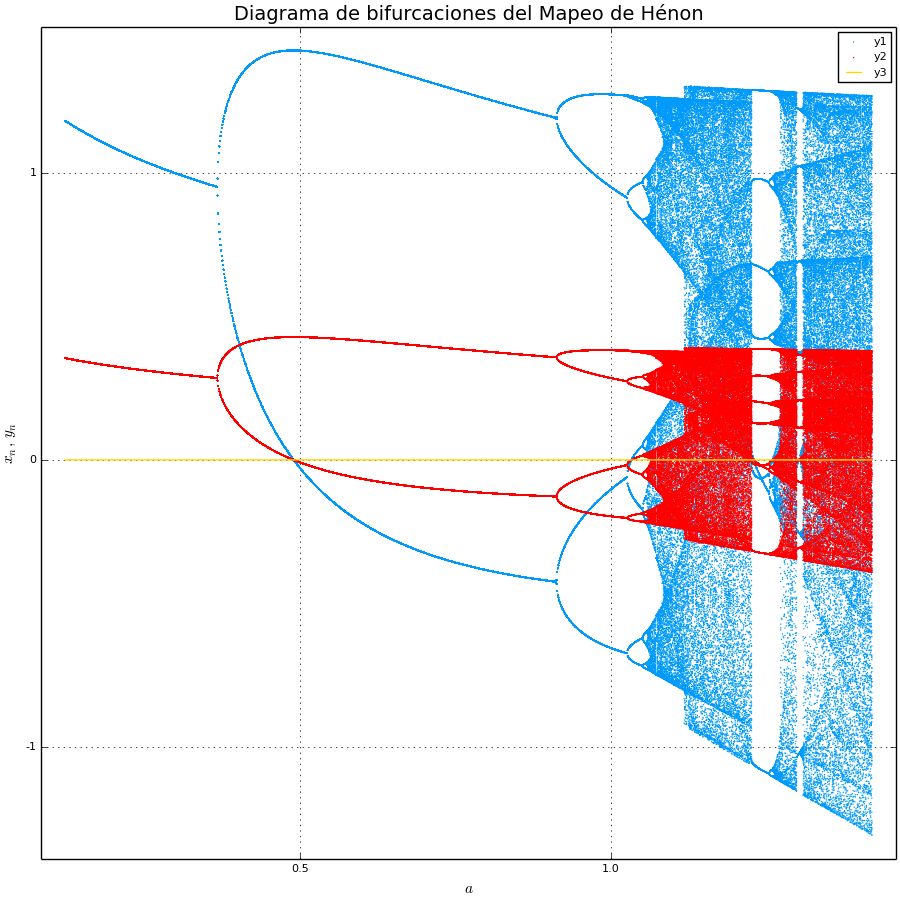

In [158]:
scatter(as,xbif, markersize=1,markerstrokecolor=false,size=(900,900))#,xlim=(1,1.1))
scatter!(as,ybif,markersize=1,markerstrokecolor=false,color=:red)
plot!(as,zeros(length(as)),c=:gold)
#(0.36597228673036497,0.366084517823527)
#(0.36735732327485593,0.3673686471347857)
#plot!([0.3673686471347857,0.3673686471347857],[-1,1.5])
#plot!([0,1.4],[0.952473, 0.952473])
xlabel!(L"a")
ylabel!(L"x_n, \ y_n")
title!("Diagrama de bifurcaciones del Mapeo de Hénon ")




Se calcula el primer punto de bifurcación dando como extremos en el intervalo inicial $a1=0$ y $a2=0.5$.


## Bifurcaciones y coeficientes de Feigenbaum.¶

Al igual que en el caso unidimensional, se estudia el tipo de órbitas que se obienen al variar un parámetro del mapeo. En este trabajo dejaermos fijo el parámetro $b$ y variaremos el parámetro $a$ dentro de un intervalo adecuado. Definamos las funciones que utlizaremos para pintar el diagrama de bifurcaciones, medir las longitudes de las órbitas, encontrar los puntos de bifurcación y calcular los coeficientes de Feigenbaum.

# Caso b=0.3

In [159]:
"""Funcion que devuelve un arreglo `diagBif´ con los últimos Nlast iterados de un mapeo f(x,c),
en donde c es un párametro. También devuelve un arreglo `cs´ que permite graficar el diagrama
de bifurcaciones
Los parámetros de entrada son los siguientes: 
-) f(x,c): la función a evaluar
-) crange: rango en el que se tomaran los valores del parámetro c
-) M: el número de iteraciones del mapeo
-) x0: la condición inicial
-) Nlast: los últimos iterados que se desea iterar para obtener las orbitas del diagrama de 
bifurcaciones
"""
function Bif_diag(Arange,M,x0,y0,b,Nlast)
diagBifX=Float64[]
diagBifY=Float64[]
As=Float64[]
    for a in Arange
        x=x0
        y=y0
        for i in 1:M
        x,y=Henon_map(x,y,a,b)
        end 
        for i in 1:Nlast
            push!(As,a)
            x,y=Henon_map(x, y, a, b)
            push!(diagBifX,x)
            push!(diagBifY,y)
        end
    end
    return As,diagBifX,diagBifY
end 

Bif_diag

In [160]:
"""esta función calcula la longitud de la orbita solamente en las X de la iteración del 
mapeo de Hénon a partir de una condición inicial (x0,y0) y dos parámetros (a,b). La función 
itera Norb veces la condición inicial y a partir de ahí ve los valores distintos 
de las x_{n+i} para determinar la longitud de la orbita en as X.
"""
function orbit_lengthX(x0,y0,a,b,Norb)
    HenAB(x,y)=Henon_map(x,y,a,b)
    x=x0
    y=y0
    tol=1e-8
    cont=1
    for i in 1:Norb
        x,y=HenAB(x,y)
    end 
    xf=x
    yf=y
    xorbit,yorbit=HenAB(xf,yf)
    while abs(xf-xorbit)>tol
        cont=cont+1
        #xf=xorbit
        xorbit,yorbit=HenAB(xorbit,yorbit)   
        if cont>1024+1
            #println("numero de iterados insuficiente")
            break
        end 
    end 
    return cont
end 
"""esta función calcula la longitud de la orbita solamente en las Y de la iteración del 
mapeo de Hénon a partir de una condición inicial (x0,y0) y dos parámetros (a,b). La función 
itera Norb veces la condición inicial y a partir de ahí ve los valores distintos 
de las y_{n+i} para determinar la longitud de la orbita en as Y.
"""
function orbit_lengthY(x0,y0,a,b,Norb)
    HenAB(x,y)=Henon_map(x,y,a,b)
    x=x0
    y=y0
    tol=1e-10
    cont=1
    for i in 1:Norb
        x,y=HenAB(x,y)
    end 
    xf=x
    yf=y
    xorbit,yorbit=HenAB(xf,yf)
    while abs(yf-yorbit)>tol
        cont=cont+1
        xorbit,yorbit=HenAB(xorbit,yorbit)   
        if cont>6*1024+1
            #println("numero de iterados insuficiente")
            break
        end 
    end 
    return cont
end 

orbit_lengthY

In [161]:
b=0.3
a0=-1/4*(1-b)^2
Arange=a0:1/2^10:1.41
M=100000
Nlast=200
x0=0.
y0=0.
as,xbif,ybif=Bif_diag(Arange, M, x0, y0, b, Nlast) ; #revisar la funcion Bif diag para hacerla 
#mas rapida;


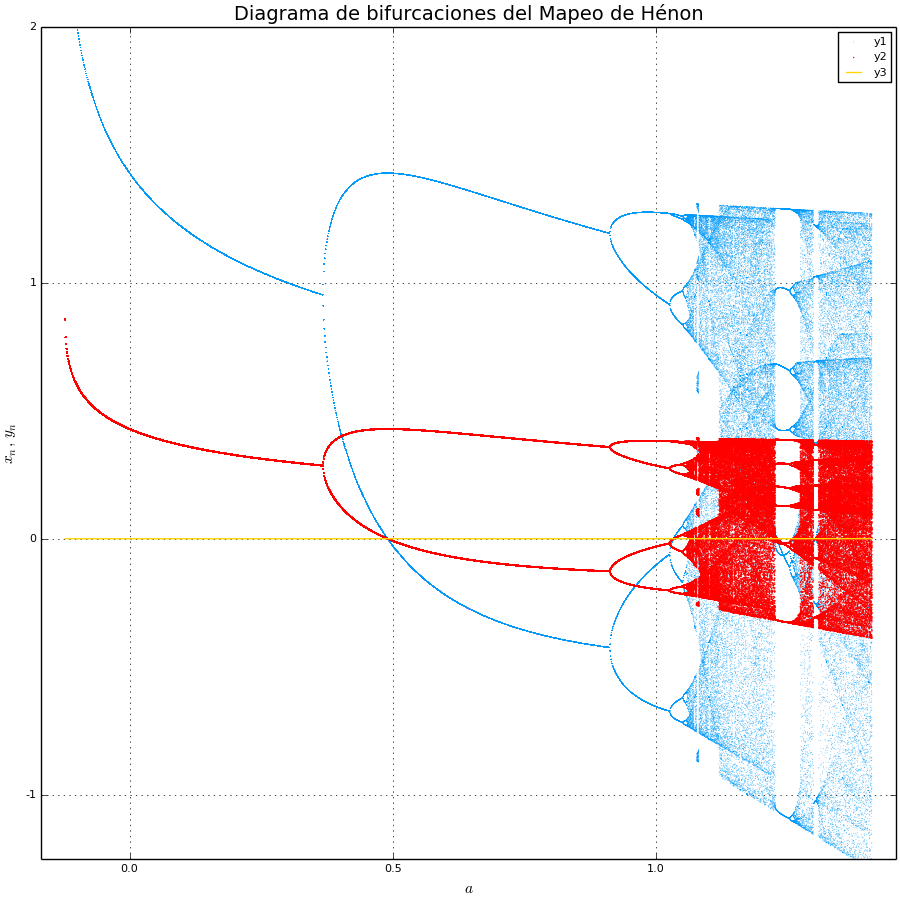

In [162]:
scatter(as,xbif, markersize=0.5,markerstrokecolor=false,size=(900,900))#,xlim=(1,1.1))
scatter!(as,ybif,markersize=1,markerstrokecolor=false,color=:red)
plot!(as,zeros(length(as)),c=:gold,ylim=(-1.25,2))

#(0.36597228673036497,0.366084517823527)
#(0.36735732327485593,0.3673686471347857)
#plot!([0.3673686471347857,0.3673686471347857],[-1,1.5])
#plot!([0,1.4],[0.952473, 0.952473])
xlabel!(L"a")
ylabel!(L"x_n, \ y_n")
title!("Diagrama de bifurcaciones del Mapeo de Hénon ")


In [163]:
"""funcion que determina (si es que existe) el punto de bifurcación (en la variable x o en la 
variable y) del mapeo de Henon.
entre dos valores de parámetro a1 y a2 con Norb iteraciones a partir de la condicion inicial
(x0,y0)
En caso de existir bifurcación, la función devuelve el valor del parámetro 
'Ab' en donde se presenta la bifurcación
NOTA: Funciona mejor con Norb>1000000"""

function point_bifX(x0,y0,b,a1,a2,Norb)
     tol=1e-14
    L1x=orbit_lengthX(x0, y0, a1, b, Norb)
    L2x=orbit_lengthX(x0, y0, a2, b, Norb)
   # while L1x>1024 || L2x>1024
    #    Norb=10Norb
     #    L1x=orbit_lengthX(x0, y0, a1, b, Norb)
      #  L2x=orbit_lengthX(x0, y0, a2, b, Norb)
    #end 
    c1=a1
    c2=a2
        if L1x==L2x#para las X's
            nothing
        else
            while abs(c1-c2)>tol
            cmed=(c1+c2)/2
            LmedX=orbit_lengthX(x0, y0, cmed, b, Norb) 
            if LmedX==L1x
                c1=cmed
                L1x=orbit_lengthX(x0, y0, c1, b, Norb) 
                else LmedX==L2x
                c2=cmed
                L2x=orbit_lengthX(x0,y0,c2,b,Norb)
            end  
            end
    end 
    #cbX=(c1+c2)/2
    
    
    
    return c2

end 

point_bifX

In [164]:
"""funcion que determina (si es que existe) el punto de bifurcación (en la variable x o en la 
variable y) del mapeo de Henon.
entre dos valores de parámetro a1 y a2 con Norb iteraciones a partir de la condicion inicial
(x0,y0)
En caso de existir bifurcación, la función devuelve el valor del parámetro 
'Ab' en donde se presenta la bifurcación
NOTA: Funciona mejor con Norb>1000000"""

function point_bifY(x0,y0,b,a1,a2,Norb)
     tol=1e-14
    L1y=orbit_lengthY(x0, y0, a1, b, Norb)
    L2y=orbit_lengthY(x0, y0, a2, b, Norb)
   # while L1x>1024 || L2x>1024
    #    Norb=10Norb
     #    L1x=orbit_lengthX(x0, y0, a1, b, Norb)
      #  L2x=orbit_lengthX(x0, y0, a2, b, Norb)
    #end 
    c1=a1
    c2=a2
    if L1y==L2y#para las X's
            nothing
        else
            while abs(c1-c2)>tol
            cmed=(c1+c2)/2
            LmedY=orbit_lengthY(x0, y0, cmed, b, Norb) 
            if LmedY==L1y
                c1=cmed
                L1y=orbit_lengthY(x0, y0, c1, b, Norb) 
                else LmedY==L2y
                c2=cmed
                L2y=orbit_lengthY(x0,y0,c2,b,Norb)
            end  
            end
    end 
    #cbX=(c1+c2)/2
    
    
    
    return c2

end 

point_bifY

In [165]:

"""Nota el step debe ser pequeño, del orden de 0.01 o menor dependiendo del parametro inicial
a0 que se le ingresó por argumento"""

function find_bifpointsX(x0,y0,b,a0,step,Norb)
    bifSx=[]
    #bifsy=[]
for i in 1:9
    step=step/i
    L0=orbit_lengthX(x0, y0, a0, b, Norb)
    a1=a0+step
    L1=orbit_lengthX(x0,y0,a1,b,Norb)
    while L0 == L1
        a1=a1+step
        #println(a1)
        L1=orbit_lengthX(x0,y0,a1,b,Norb)
    end 
    a0new=a1-step
    bifx=point_bifX(x0, y0, a0new,a1, Norb) 
    push!(bifSx,bifx)
    
    a0=a1
end 
    return bifSx
        
end 

"""Nota el step debe ser pequeño, del orden de 0.01 o menor dependiendo del parametro inicial
a0 que se le ingresó por argumento"""

function find_bifpointsY(x0,y0,b,a0,step,Norb)
    bifSy=[]
    #bifsy=[]
for i in 1:9
    step=step/i
    L0=orbit_lengthY(x0, y0, a0, b, Norb)
    a1=a0+step
    L1=orbit_lengthY(x0,y0,a1,b,Norb)
    while L0 == L1
        a1=a1+step
        #println(a1)
        L1=orbit_lengthY(x0,y0,a1,b,Norb)
    end 
    a0new=a1-step
        bify=point_bifY(x0,y0,b,a0new,a1,Norb) 
        push!(bifSy,bify)
    
    a0=a1
end 
    return bifSy
        
end 

find_bifpointsY

In [166]:
"""Función que calcula los parámetros de Feigenbaum con los puntos superestables dados 
en un arreglo cs"""
function fn_ratio(cn)
    fn=Float64[]
    for i in 1:length(cn)-2
        ratio=(cn[i]-cn[i+1])/(cn[i+1]-cn[i+2])
        push!(fn,ratio)
    end 
    return fn
end

fn_ratio

In [176]:
x0=0.0
y0=0.0
a0=0.3
b=0.3
step=0.01
Norb=100000
@time BIFSX=find_bifpointsX(x0, y0, b, a0, step, Norb) 

LoadError: LoadError: MethodError: no method matching point_bifX(::Float64, ::Float64, ::Float64, ::Float64, ::Int64)
Closest candidates are:
  point_bifX(::Any, ::Any, ::Any, ::Any, ::Any, !Matched::Any) at In[163]:10
while loading In[176], in expression starting on line 184

In [168]:
FeigsX=fn_ratio(BIFS);

LoadError: LoadError: UndefVarError: BIFS not defined
while loading In[168], in expression starting on line 1

In [169]:
push!(FeigsX,0);

LoadError: LoadError: UndefVarError: FeigsX not defined
while loading In[169], in expression starting on line 1

In [170]:
x0=0.0
y0=0.0
a0=0.3
b=0.3
step=0.01
Norb=100000
@time BIFSY=find_bifpointsY(x0, y0,b, a0, step, Norb) ;

  0.571885 seconds (13.37 k allocations: 565.633 KB)


In [171]:
FeigsY=fn_ratio(BIFS);


LoadError: LoadError: UndefVarError: BIFS not defined
while loading In[171], in expression starting on line 1

In [172]:
push!(FeigsY,0);

LoadError: LoadError: UndefVarError: FeigsY not defined
while loading In[172], in expression starting on line 1

In [173]:
Bifs_X = DataFrame(n = ["1","2","3","4","5","6","7","8","9"], 
C_n = BIFSX[:], f_n =  FeigsX[:])

LoadError: LoadError: UndefVarError: DataFrame not defined
while loading In[173], in expression starting on line 1

In [174]:
Bifs_Y = DataFrame(n = ["1","2","3","4","5","6","7","8","9"], 
C_n = BIFSY[:], f_n =  FeigsY[:])

LoadError: LoadError: UndefVarError: DataFrame not defined
while loading In[174], in expression starting on line 1

# Referencias

1. Hénon,M. (1976). A Two-dimensional Mapping with a Strange Attractor. Communications in Mathematical Physics, 50, 69-77.  
2. Hénon, M. (1969). Numerical Study of Quadratic Area-Preserving Mappings. Quart. Appl. Math. 27, 291-312. 
3. Hiob, Eric. "Finding Areas Using the Monte Carlo Method". The BCIT Math Square. Math Department British Columbia Institute of Technology. 1996-12-7. Consultado 2016-11-21. http://commons.bcit.ca/math/entertainment/monte/index.html
4. Hiob, Eric. "The Inside or Outside Problem". The BCIT Math Square. Math Department British Columbia Institute of Technology. 1996-12-7. Consultado 2016-21-11. http://commons.bcit.ca/math/entertainment/inout/index.html
5. Feiguin, Adrian. "Monte Carlo error analysis". Phys 5870: Modern Computational Methods in Solids. Northeastern University. 2009-11-04. Consultado 2016-3-12. http://www.northeastern.edu/afeiguin/phys5870/phys5870/node71.html 